In [2]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

# Import specific components from TensorFlow and Keras
from tensorflow import keras  
from tensorflow.keras import layers  
from tensorflow.keras.models import Sequential  

In [3]:
# Define the URL for the dataset and download it using TensorFlow's utility function
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [4]:
# Convert the data directory path to a pathlib object
#Pathlib is a native Python library for handling files 
#and paths on your operating system.

import pathlib  
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

**You can use pathlib object "data_dir" to do operation like give me all the images with .jpg extenstion.**

In [5]:
#getting images with .jpg extenstion.

list(data_dir.glob("*/*.jpg"))

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8983268106_dc913d17d8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6803363808_9f9ce98186_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14267691818_301aceda07.jpg'),
 PosixPath('datasets/flower_photos/roses/4558025386_2c47314528.jpg'),
 PosixPath('datasets/flower_photos/roses/17990320484_93bba345d2_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4608559939_3487bf3b62_n.jpg'),
 PosixPath('datasets/flower_photos/roses/18599603859_f2ec616ddf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8723767157_c45bfd3ab6.jpg')

In [6]:
# Total number of images we have 

image_count = len(list(data_dir.glob("*/*.jpg")))
image_count 

3670

In [7]:
# glob is usefull to get path of images with perticular lablel
roses=list(data_dir.glob("roses/*"))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

**PIL stands for Python Imaging Library, and it's the original library that enabled Python to deal with images.**

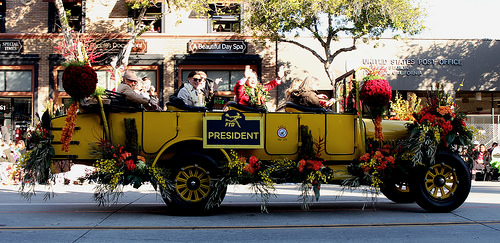

In [8]:
# Using PIL show roses

PIL.Image.open(str(roses[0]))

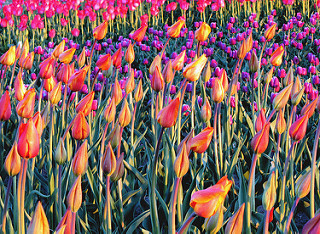

In [9]:
# Using PIL show tulips

tulips=list(data_dir.glob("tulips/*"))
PIL.Image.open(str(tulips[0]))

In [10]:
# Create dictionaries to store images and their corresponding labels
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
# acessing the perticular flower form flowers_images_dict

flowers_images_dict["roses"]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8983268106_dc913d17d8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6803363808_9f9ce98186_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14267691818_301aceda07.jpg'),
 PosixPath('datasets/flower_photos/roses/4558025386_2c47314528.jpg'),
 PosixPath('datasets/flower_photos/roses/17990320484_93bba345d2_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4608559939_3487bf3b62_n.jpg'),
 PosixPath('datasets/flower_photos/roses/18599603859_f2ec616ddf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8723767157_c45bfd3ab6.jpg')

In [12]:
# Assign numerical labels to each category of flowers
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [13]:
# getting the path of perticular image
flowers_images_dict["roses"][0]

PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg')

**Now we can use cv2 module to read any image file in OpenCV object(Like numpy array)**

In [14]:
# OpenCV expect string path so default one does't work
# So we need to warp up in str to give it to OpenCV

img= cv2.imread(str(flowers_images_dict["roses"][0]))

img

array([[[ 14,   3,   0],
        [  1,   0,   2],
        [  0,   0,   6],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       [[  0,   0,   9],
        [  0,   0,   4],
        [  4,   7,   5],
        ...,
        [243, 244, 242],
        [243, 244, 242],
        [243, 244, 242]],

       [[  3,  57, 164],
        [ 30,  63, 132],
        [  0,   0,  19],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       ...,

       [[140, 105,  85],
        [146, 112,  89],
        [147, 113,  90],
        ...,
        [155, 125,  96],
        [152, 122,  93],
        [148, 118,  89]],

       [[148, 114,  91],
        [152, 118,  95],
        [150, 116,  93],
        ...,
        [154, 124,  95],
        [152, 122,  93],
        [150, 120,  93]],

       [[153, 119,  96],
        [154, 120,  97],
        [149, 115,  91],
        ...,
        [151, 122,  95],
        [153, 123,  94],
        [151, 121,  94]]

**^ Above OpenCV read the image from disk & convert to 3D numpy array.**

In [15]:
# Viewing 3D numpy array
img.shape

(243, 500, 3)

**In the Data, we have images with a different dimensions And to train the model we Need to all the images in Same dimensions. OpenCV Help with that.**

In [16]:
# OpenCV resize the image

cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
# Getting the keys and values from our dictionary
for flowers_name,images in flowers_images_dict.items():
    print(flowers_name)
    print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [18]:
# Preparing the X and Y while Resizing the images
x,y=[],[]

for flowers_name,images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flowers_name])
"""You can call flowers_labels_dict becoz of
Shared Keys: Both flowers_images_dict and flowers_labels_dict use the same keys 
(flower category names like 'roses', 'daisy', etc.). 
"""

"You can call flowers_labels_dict becoz of\nShared Keys: Both flowers_images_dict and flowers_labels_dict use the same keys \n(flower category names like 'roses', 'daisy', etc.). \n"

In [19]:
# For further operations we need X Y in NumPy Arrays so we do Conversion to NumPy Arrays

x=np.array(x)
y=np.array(y)

In [20]:
# Split the data into training and testing sets 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [21]:
x_test[0]

array([[[  2,   2,   2],
        [  1,   1,   1],
        [  3,   3,   3],
        ...,
        [  3,   3,   3],
        [  0,   0,   0],
        [  1,   1,   1]],

       [[  2,   2,   2],
        [ 22,  22,  22],
        [ 34,  34,  34],
        ...,
        [ 35,  35,  35],
        [ 21,  21,  21],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [104, 104, 104],
        [182, 181, 181],
        ...,
        [184, 183, 183],
        [103, 103, 103],
        [  2,   2,   2]],

       ...,

       [[  3,   3,   3],
        [ 55,  55,  55],
        [ 97,  97,  97],
        ...,
        [ 97,  97,  97],
        [ 55,  55,  55],
        [  2,   2,   2]],

       [[  1,   1,   1],
        [  2,   2,   2],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  2,   2,   2],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0]]

**Image data is not scalled to we need to scale it by dividing by 255**

In [22]:
# Scalling
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [23]:
# Viewing the scalled value
x_train_scaled[0]

array([[[0.69411765, 0.67058824, 0.74901961],
        [0.70196078, 0.68235294, 0.78431373],
        [0.7254902 , 0.68627451, 0.78039216],
        ...,
        [0.17647059, 0.24705882, 0.24313725],
        [0.16078431, 0.21568627, 0.20784314],
        [0.07058824, 0.29803922, 0.25098039]],

       [[0.70196078, 0.65098039, 0.76470588],
        [0.71764706, 0.66666667, 0.78823529],
        [0.72156863, 0.66666667, 0.77254902],
        ...,
        [0.12156863, 0.18431373, 0.17647059],
        [0.14117647, 0.17254902, 0.16862745],
        [0.06666667, 0.39607843, 0.3372549 ]],

       [[0.70588235, 0.63529412, 0.74901961],
        [0.73333333, 0.65882353, 0.77647059],
        [0.72941176, 0.66666667, 0.76078431],
        ...,
        [0.10980392, 0.18039216, 0.16862745],
        [0.20392157, 0.22745098, 0.21960784],
        [0.07058824, 0.50588235, 0.42745098]],

       ...,

       [[0.22352941, 0.29019608, 0.16470588],
        [0.17647059, 0.27058824, 0.14509804],
        [0.27843137, 0

In [24]:
# Define the convolutional neural network (CNN) architecture using Keras Sequential API

# Number of classes(Flowers that we have 5)
num_classes=5

model = Sequential([
    # Making convolutional layer
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),

    # To pass CNN to Dense layer we need to convert it into 1D using Flatten layer
    layers.Flatten(),
    # Making Dense layer
    layers.Dense(128,activation="relu"),
    layers.Dense(num_classes)
])

model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

model.fit(x_train_scaled,y_train,epochs=30)

"""setting from_logits=True means that the model's output isn't transformed 
(like using softmax) before calculating the loss. Instead, it directly uses 
the raw predictions from the model. This can be better for numerical stability 
and efficiency during training."""

2024-05-19 04:26:11.006918: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-05-19 04:26:11.006991: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-05-19 04:26:11.007007: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-05-19 04:26:11.008794: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-19 04:26:11.011240: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/30


2024-05-19 04:26:41.497036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


86/86 [==============================] - 6s 59ms/step - loss: 1.5690 - accuracy: 0.3576
Epoch 2/30
86/86 [==============================] - 7s 77ms/step - loss: 1.1237 - accuracy: 0.5287
Epoch 3/30
86/86 [==============================] - 7s 79ms/step - loss: 1.0503 - accuracy: 0.5836
Epoch 4/30
86/86 [==============================] - 9s 106ms/step - loss: 1.1295 - accuracy: 0.5927
Epoch 5/30
86/86 [==============================] - 9s 104ms/step - loss: 1.1702 - accuracy: 0.5654
Epoch 6/30
86/86 [==============================] - 8s 90ms/step - loss: 0.8543 - accuracy: 0.6962
Epoch 7/30
86/86 [==============================] - 7s 85ms/step - loss: 0.7361 - accuracy: 0.7362
Epoch 8/30
86/86 [==============================] - 7s 85ms/step - loss: 1.0619 - accuracy: 0.7169
Epoch 9/30
86/86 [==============================] - 7s 84ms/step - loss: 1.2038 - accuracy: 0.6348
Epoch 10/30
86/86 [==============================] - 7s 85ms/step - loss: 0.5243 - accuracy: 0.8285
Epoch 11/30
86/86 

"setting from_logits=True means that the model's output isn't transformed \n(like using softmax) before calculating the loss. Instead, it directly uses \nthe raw predictions from the model. This can be better for numerical stability \nand efficiency during training."

In [25]:
model.evaluate(x_test_scaled,y_test)

2024-05-19 04:30:37.512179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 1s 19ms/step - loss: 1811.3943 - accuracy: 0.5054


[1811.394287109375, 0.5054466128349304]

**So our traing accuracy was good but during test data we got half accuracy**

In [26]:
# Doing prediction using our model

predictions=model.predict(x_test_scaled)
predictions

10/29 [=========>....................] - ETA: 0s

2024-05-19 04:30:39.475816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 0s 11ms/step


array([[ 1505.0016,  1464.8947, -2379.8306, -9925.8125, -3280.458 ],
       [ 7882.3955,  1626.6954, -5332.095 , -1671.1962,  2215.3992],
       [24904.154 , 28778.55  , 33882.254 , 25256.703 , 20176.123 ],
       ...,
       [  628.1603, 12481.4375,  8822.015 , 12078.424 ,   847.8418],
       [-2119.7327, -6701.3105, -7432.4067, -2797.9856,  3466.0967],
       [ 6136.0664, 11908.434 ,  8464.987 , 23378.955 ,  6825.047 ]],
      dtype=float32)

**Above we are getting very Scattered output becoz When we build a Dense network we did't specify the output layer. So the default activation function as linear activation function**

In [36]:
# converting the Scattered output to Probability score

score= tf.nn.softmax(predictions[1])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 0., 0., 0., 0.], dtype=float32)>

In [37]:
np.argmax(score)

0

**^ Above** It predicted the second image as rose

**V below** in from y_test we can veryfy that it predicited correctly

In [38]:
y_test[1]

0

**Still Our model give only 50% of accuracy so we can fix that By using Data augmentation**

In [46]:
data_augmentation =keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.9),
])

**Original Image**

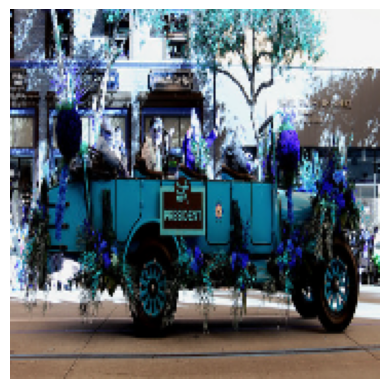

In [42]:
plt.axis('off')
plt.imshow(x[0])

**Newly generated training sample using data augmentation**

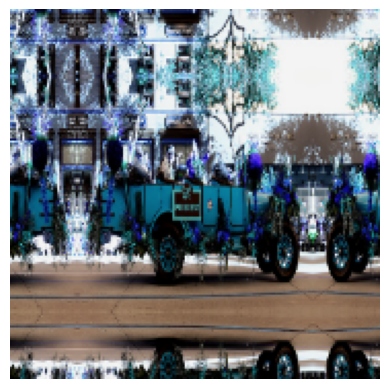

In [47]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

**From above image you can see that RandomZoom make image zoomed out**

There are diff data_augmentation like contrast, rotate etc

In [40]:
data_augmentation =keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
])

#### Appling data_augmentation to our data

In [49]:
# Define image augmentation preprocessing layers using Keras Sequential API
img_height = 180
img_width = 180
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

In [54]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train_scaled, y_train, epochs=30)  

Epoch 1/30


2024-05-19 04:57:51.557771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-05-19 04:57:51.815820: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/86 [>.............................] - ETA: 8s - loss: 3.9089 - accuracy: 0.1771 

2024-05-19 04:57:53.434010: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:53.544931: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:53.626723: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/86 [=>............................] - ETA: 7s - loss: 3.7305 - accuracy: 0.2031

2024-05-19 04:57:53.706276: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:53.790771: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:53.857243: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/86 [==>...........................] - ETA: 6s - loss: 3.2365 - accuracy: 0.2031

2024-05-19 04:57:53.928608: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:53.996719: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:54.062496: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:54.124964: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/86 [===>..........................] - ETA: 5s - loss: 2.9061 - accuracy: 0.2043

2024-05-19 04:57:54.190160: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:54.264598: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:54.332436: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/86 [====>.........................] - ETA: 5s - loss: 2.6084 - accuracy: 0.2022

2024-05-19 04:57:54.409482: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:54.481629: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:54.548396: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/86 [=====>........................] - ETA: 5s - loss: 2.5058 - accuracy: 0.2007

2024-05-19 04:57:54.617488: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:54.701342: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:54.782623: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/86 [======>.......................] - ETA: 4s - loss: 2.3887 - accuracy: 0.1974

2024-05-19 04:57:54.858554: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:54.943287: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:55.047698: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/86 [=======>......................] - ETA: 4s - loss: 2.2970 - accuracy: 0.1963

2024-05-19 04:57:55.123358: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:55.216117: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:55.285585: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/86 [========>.....................] - ETA: 4s - loss: 2.2297 - accuracy: 0.2009

2024-05-19 04:57:55.351882: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:55.441264: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:55.527402: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/86 [==========>...................] - ETA: 4s - loss: 2.1479 - accuracy: 0.2148

2024-05-19 04:57:55.600430: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:55.671501: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:55.736890: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:55.798820: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/86 [===========>..................] - ETA: 3s - loss: 2.0986 - accuracy: 0.2205

2024-05-19 04:57:55.861571: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:55.935456: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:56.009968: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/86 [===========>..................] - ETA: 3s - loss: 2.0693 - accuracy: 0.2238

2024-05-19 04:57:56.082297: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:56.206007: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/86 [============>.................] - ETA: 4s - loss: 2.0544 - accuracy: 0.2270

2024-05-19 04:57:56.644780: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/86 [============>.................] - ETA: 4s - loss: 2.0398 - accuracy: 0.2324

2024-05-19 04:57:57.093807: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/86 [=============>................] - ETA: 4s - loss: 2.0116 - accuracy: 0.2401

2024-05-19 04:57:57.382526: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:57.510485: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/86 [==============>...............] - ETA: 4s - loss: 1.9890 - accuracy: 0.2435

2024-05-19 04:57:57.687709: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:57.837548: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/86 [==============>...............] - ETA: 4s - loss: 1.9721 - accuracy: 0.2444

2024-05-19 04:57:58.024017: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:58.207346: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/86 [===============>..............] - ETA: 4s - loss: 1.9602 - accuracy: 0.2480

2024-05-19 04:57:58.390891: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/86 [===============>..............] - ETA: 4s - loss: 1.9449 - accuracy: 0.2513

2024-05-19 04:57:58.642097: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:58.798469: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/86 [================>.............] - ETA: 4s - loss: 1.9362 - accuracy: 0.2519

2024-05-19 04:57:58.936017: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/86 [================>.............] - ETA: 4s - loss: 1.9186 - accuracy: 0.2512

2024-05-19 04:57:59.638211: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:59.827023: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/86 [=================>............] - ETA: 4s - loss: 1.9040 - accuracy: 0.2541

2024-05-19 04:58:00.062492: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:58:00.273266: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/86 [=================>............] - ETA: 4s - loss: 1.8993 - accuracy: 0.2558

2024-05-19 04:58:00.527660: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/86 [==================>...........] - ETA: 4s - loss: 1.8837 - accuracy: 0.2584

2024-05-19 04:58:00.813982: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:58:01.010075: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/86 [===================>..........] - ETA: 3s - loss: 1.8745 - accuracy: 0.2597

2024-05-19 04:58:01.206998: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:58:01.377816: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/86 [===================>..........] - ETA: 3s - loss: 1.8622 - accuracy: 0.2620

2024-05-19 04:58:01.630442: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:58:01.778216: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/86 [====================>.........] - ETA: 3s - loss: 1.8544 - accuracy: 0.2614

2024-05-19 04:58:01.917221: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:58:02.011805: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


64/86 [=====================>........] - ETA: 3s - loss: 1.8491 - accuracy: 0.2627

2024-05-19 04:58:02.123188: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:58:02.251279: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


66/86 [======================>.......] - ETA: 2s - loss: 1.8400 - accuracy: 0.2618

2024-05-19 04:58:02.488253: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:58:02.677865: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


68/86 [======================>.......] - ETA: 2s - loss: 1.8280 - accuracy: 0.2647

2024-05-19 04:58:02.815175: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:58:02.929495: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


70/86 [=======================>......] - ETA: 2s - loss: 1.8169 - accuracy: 0.2696

2024-05-19 04:58:03.068281: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:58:03.214640: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


72/86 [========================>.....] - ETA: 1s - loss: 1.8070 - accuracy: 0.2708

2024-05-19 04:58:03.354293: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:58:03.489779: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


74/86 [========================>.....] - ETA: 1s - loss: 1.7946 - accuracy: 0.2745

2024-05-19 04:58:03.643004: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:58:03.801918: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


76/86 [=========================>....] - ETA: 1s - loss: 1.7853 - accuracy: 0.2767

2024-05-19 04:58:04.078247: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:58:04.270891: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


77/86 [=========================>....] - ETA: 1s - loss: 1.7795 - accuracy: 0.2788

2024-05-19 04:58:04.376522: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


KeyboardInterrupt: 

In [51]:
# Compile the model with appropriate loss function, optimizer, and evaluation metric
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [53]:
# Train the model on the training data with data augmentation for 30 epochs
model.fit(x_train_scaled, y_train, epochs=30)

Epoch 1/30


2024-05-19 04:56:20.087678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-05-19 04:56:20.282231: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/86 [>.............................] - ETA: 6s - loss: 3.5700 - accuracy: 0.2292

2024-05-19 04:56:21.621332: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:21.705603: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:21.771603: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/86 [=>............................] - ETA: 6s - loss: 2.8895 - accuracy: 0.2188

2024-05-19 04:56:21.849652: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:21.922325: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:22.003948: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/86 [==>...........................] - ETA: 5s - loss: 2.7841 - accuracy: 0.1944

2024-05-19 04:56:22.069809: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:22.141593: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:22.210516: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/86 [==>...........................] - ETA: 5s - loss: 2.6168 - accuracy: 0.2045

2024-05-19 04:56:22.281714: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:22.378764: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/86 [===>..........................] - ETA: 7s - loss: 2.4837 - accuracy: 0.1995

2024-05-19 04:56:22.724374: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/86 [===>..........................] - ETA: 8s - loss: 2.4266 - accuracy: 0.2031

2024-05-19 04:56:22.936063: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:23.058803: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/86 [====>.........................] - ETA: 8s - loss: 2.3157 - accuracy: 0.2051

2024-05-19 04:56:23.231951: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:23.400104: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/86 [=====>........................] - ETA: 8s - loss: 2.2340 - accuracy: 0.2066

2024-05-19 04:56:23.595774: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:23.774404: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/86 [=====>........................] - ETA: 8s - loss: 2.1673 - accuracy: 0.2141

2024-05-19 04:56:23.924641: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:24.069560: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/86 [======>.......................] - ETA: 8s - loss: 2.1094 - accuracy: 0.2188

2024-05-19 04:56:24.186577: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:24.341370: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/86 [=======>......................] - ETA: 8s - loss: 2.0661 - accuracy: 0.2201

2024-05-19 04:56:24.480717: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:24.614936: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/86 [========>.....................] - ETA: 7s - loss: 2.0258 - accuracy: 0.2224

2024-05-19 04:56:24.743414: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:24.876221: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/86 [========>.....................] - ETA: 7s - loss: 1.9884 - accuracy: 0.2221

2024-05-19 04:56:25.023517: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:25.161891: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/86 [=========>....................] - ETA: 7s - loss: 1.9558 - accuracy: 0.2260

2024-05-19 04:56:25.306843: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:25.470385: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/86 [=========>....................] - ETA: 7s - loss: 1.9423 - accuracy: 0.2278

2024-05-19 04:56:25.596080: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/86 [==========>...................] - ETA: 7s - loss: 1.9196 - accuracy: 0.2206

2024-05-19 04:56:25.836599: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:25.952223: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/86 [===========>..................] - ETA: 7s - loss: 1.9003 - accuracy: 0.2223

2024-05-19 04:56:26.201504: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:26.402967: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/86 [===========>..................] - ETA: 6s - loss: 1.8776 - accuracy: 0.2289

2024-05-19 04:56:26.557928: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:26.727938: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/86 [============>.................] - ETA: 6s - loss: 1.8603 - accuracy: 0.2316

2024-05-19 04:56:26.842450: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:27.016698: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


41/86 [=============>................] - ETA: 6s - loss: 1.8400 - accuracy: 0.2378

2024-05-19 04:56:27.311982: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:27.457552: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


43/86 [==============>...............] - ETA: 6s - loss: 1.8217 - accuracy: 0.2413

2024-05-19 04:56:27.555112: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:27.687657: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/86 [==============>...............] - ETA: 6s - loss: 1.8181 - accuracy: 0.2393

2024-05-19 04:56:27.834152: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/86 [==============>...............] - ETA: 6s - loss: 1.8167 - accuracy: 0.2375

2024-05-19 04:56:28.073790: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/86 [===============>..............] - ETA: 5s - loss: 1.8039 - accuracy: 0.2380

2024-05-19 04:56:28.359500: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:28.487506: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/86 [================>.............] - ETA: 5s - loss: 1.7883 - accuracy: 0.2423

2024-05-19 04:56:28.645467: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:28.790446: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


51/86 [================>.............] - ETA: 5s - loss: 1.7711 - accuracy: 0.2549

2024-05-19 04:56:28.904230: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:29.038850: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


53/86 [=================>............] - ETA: 4s - loss: 1.7608 - accuracy: 0.2606

2024-05-19 04:56:29.177999: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:29.330429: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


55/86 [==================>...........] - ETA: 4s - loss: 1.7511 - accuracy: 0.2642

2024-05-19 04:56:29.468592: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:29.609521: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


57/86 [==================>...........] - ETA: 4s - loss: 1.7367 - accuracy: 0.2692

2024-05-19 04:56:29.770456: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:29.939929: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


59/86 [===================>..........] - ETA: 4s - loss: 1.7267 - accuracy: 0.2738

2024-05-19 04:56:30.083515: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:30.234862: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


61/86 [====================>.........] - ETA: 3s - loss: 1.7132 - accuracy: 0.2782

2024-05-19 04:56:30.410400: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:30.546278: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


63/86 [====================>.........] - ETA: 3s - loss: 1.7032 - accuracy: 0.2837

2024-05-19 04:56:30.668393: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:30.838175: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


65/86 [=====================>........] - ETA: 3s - loss: 1.6924 - accuracy: 0.2880

2024-05-19 04:56:31.001478: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:31.201002: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


67/86 [======================>.......] - ETA: 2s - loss: 1.6867 - accuracy: 0.2892

2024-05-19 04:56:31.410835: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:31.520130: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


69/86 [=======================>......] - ETA: 2s - loss: 1.6771 - accuracy: 0.2917

2024-05-19 04:56:31.637707: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:31.784133: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


71/86 [=======================>......] - ETA: 2s - loss: 1.6619 - accuracy: 0.2984

2024-05-19 04:56:31.965294: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:32.104273: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


73/86 [========================>.....] - ETA: 1s - loss: 1.6491 - accuracy: 0.3061

2024-05-19 04:56:32.248110: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:32.375653: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


74/86 [========================>.....] - ETA: 1s - loss: 1.6410 - accuracy: 0.3100

2024-05-19 04:56:32.575918: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


76/86 [=========================>....] - ETA: 1s - loss: 1.6314 - accuracy: 0.3146

2024-05-19 04:56:32.818709: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:32.963162: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


78/86 [==========================>...] - ETA: 1s - loss: 1.6222 - accuracy: 0.3165

2024-05-19 04:56:33.099479: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:33.258671: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


80/86 [==========================>...] - ETA: 0s - loss: 1.6127 - accuracy: 0.3195

2024-05-19 04:56:33.390792: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:33.527614: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


82/86 [===========================>..] - ETA: 0s - loss: 1.6013 - accuracy: 0.3251

2024-05-19 04:56:33.657970: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:33.792166: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


84/86 [============================>.] - ETA: 0s - loss: 1.5920 - accuracy: 0.3278

2024-05-19 04:56:33.921899: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:34.096489: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


86/86 [==============================] - 16s 150ms/step - loss: 1.5818 - accuracy: 0.3314
Epoch 2/30


2024-05-19 04:56:34.239925: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:34.387974: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/86 [..............................] - ETA: 13s - loss: 1.3464 - accuracy: 0.3438

2024-05-19 04:56:34.511726: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:34.672474: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/86 [>.............................] - ETA: 11s - loss: 1.2818 - accuracy: 0.3854

2024-05-19 04:56:34.802289: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 5/86 [>.............................] - ETA: 12s - loss: 1.2346 - accuracy: 0.4187

2024-05-19 04:56:35.024253: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:35.152194: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 7/86 [=>............................] - ETA: 12s - loss: 1.2669 - accuracy: 0.4152

2024-05-19 04:56:35.276253: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:35.428996: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 9/86 [==>...........................] - ETA: 11s - loss: 1.2280 - accuracy: 0.4306

2024-05-19 04:56:35.561752: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:35.708578: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


11/86 [==>...........................] - ETA: 11s - loss: 1.2465 - accuracy: 0.4261

2024-05-19 04:56:35.869522: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:36.042983: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/86 [===>..........................] - ETA: 11s - loss: 1.2487 - accuracy: 0.4231

2024-05-19 04:56:36.186141: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:36.336427: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


15/86 [====>.........................] - ETA: 10s - loss: 1.2327 - accuracy: 0.4417

2024-05-19 04:56:36.453413: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:36.597633: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


17/86 [====>.........................] - ETA: 10s - loss: 1.2461 - accuracy: 0.4375

2024-05-19 04:56:36.741952: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:36.877579: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


19/86 [=====>........................] - ETA: 10s - loss: 1.2538 - accuracy: 0.4441

2024-05-19 04:56:37.095549: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:37.236151: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


21/86 [======>.......................] - ETA: 9s - loss: 1.2760 - accuracy: 0.4405

2024-05-19 04:56:37.386752: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:37.507845: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


23/86 [=======>......................] - ETA: 9s - loss: 1.2984 - accuracy: 0.4443

2024-05-19 04:56:37.634078: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:37.776203: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


25/86 [=======>......................] - ETA: 9s - loss: 1.2927 - accuracy: 0.4487

2024-05-19 04:56:37.913075: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:38.114183: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


27/86 [========>.....................] - ETA: 8s - loss: 1.2892 - accuracy: 0.4491

2024-05-19 04:56:38.244417: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:38.372153: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


29/86 [=========>....................] - ETA: 8s - loss: 1.2882 - accuracy: 0.4483

2024-05-19 04:56:38.504844: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:38.643116: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/86 [=========>....................] - ETA: 8s - loss: 1.2902 - accuracy: 0.4458

2024-05-19 04:56:38.790521: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


31/86 [=========>....................] - ETA: 8s - loss: 1.2834 - accuracy: 0.4506

2024-05-19 04:56:39.075669: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


33/86 [==========>...................] - ETA: 8s - loss: 1.2777 - accuracy: 0.4564

2024-05-19 04:56:39.454795: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/86 [==========>...................] - ETA: 8s - loss: 1.2734 - accuracy: 0.4568

2024-05-19 04:56:39.698939: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:39.900997: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


35/86 [===========>..................] - ETA: 8s - loss: 1.2755 - accuracy: 0.4527

2024-05-19 04:56:40.106651: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


37/86 [===========>..................] - ETA: 8s - loss: 1.2735 - accuracy: 0.4519

2024-05-19 04:56:40.342941: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/86 [============>.................] - ETA: 8s - loss: 1.2728 - accuracy: 0.4523

2024-05-19 04:56:40.604205: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:40.790382: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


39/86 [============>.................] - ETA: 8s - loss: 1.2717 - accuracy: 0.4543

2024-05-19 04:56:40.991959: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/86 [============>.................] - ETA: 7s - loss: 1.2731 - accuracy: 0.4563

2024-05-19 04:56:41.257073: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/86 [=============>................] - ETA: 7s - loss: 1.2630 - accuracy: 0.4613

2024-05-19 04:56:41.511327: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:41.718710: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


45/86 [==============>...............] - ETA: 7s - loss: 1.2471 - accuracy: 0.4681

2024-05-19 04:56:41.935847: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:42.021252: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:42.123561: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


47/86 [===============>..............] - ETA: 6s - loss: 1.2386 - accuracy: 0.4727

2024-05-19 04:56:42.280569: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:42.471341: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


49/86 [================>.............] - ETA: 6s - loss: 1.2316 - accuracy: 0.4764

2024-05-19 04:56:42.625376: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:42.773900: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/86 [================>.............] - ETA: 6s - loss: 1.2315 - accuracy: 0.4769

2024-05-19 04:56:42.908548: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/86 [=================>............] - ETA: 5s - loss: 1.2258 - accuracy: 0.4820

2024-05-19 04:56:43.220437: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:43.404434: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/86 [=================>............] - ETA: 5s - loss: 1.2244 - accuracy: 0.4815

2024-05-19 04:56:43.813607: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:43.965487: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/86 [==================>...........] - ETA: 5s - loss: 1.2214 - accuracy: 0.4821

2024-05-19 04:56:44.147873: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:44.339126: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/86 [===================>..........] - ETA: 4s - loss: 1.2178 - accuracy: 0.4817

2024-05-19 04:56:44.443764: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:44.568918: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/86 [===================>..........] - ETA: 4s - loss: 1.2096 - accuracy: 0.4880

2024-05-19 04:56:44.692463: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:44.846809: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/86 [====================>.........] - ETA: 4s - loss: 1.2111 - accuracy: 0.4874

2024-05-19 04:56:45.169174: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:45.288303: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


64/86 [=====================>........] - ETA: 3s - loss: 1.2067 - accuracy: 0.4878

2024-05-19 04:56:45.449198: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:45.592569: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


66/86 [======================>.......] - ETA: 3s - loss: 1.2031 - accuracy: 0.4910

2024-05-19 04:56:45.758960: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:45.877006: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


68/86 [======================>.......] - ETA: 3s - loss: 1.2085 - accuracy: 0.4913

2024-05-19 04:56:46.018388: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:46.148015: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


70/86 [=======================>......] - ETA: 2s - loss: 1.2143 - accuracy: 0.4924

2024-05-19 04:56:46.270527: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:46.406383: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


72/86 [========================>.....] - ETA: 2s - loss: 1.2144 - accuracy: 0.4913

2024-05-19 04:56:46.541215: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:46.683949: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


74/86 [========================>.....] - ETA: 2s - loss: 1.2106 - accuracy: 0.4932

2024-05-19 04:56:46.818043: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:46.961707: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


76/86 [=========================>....] - ETA: 1s - loss: 1.2195 - accuracy: 0.4910

2024-05-19 04:56:47.087877: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:47.235686: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


78/86 [==========================>...] - ETA: 1s - loss: 1.2227 - accuracy: 0.4892

2024-05-19 04:56:47.359487: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:47.493317: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


80/86 [==========================>...] - ETA: 1s - loss: 1.2233 - accuracy: 0.4898

2024-05-19 04:56:47.618438: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:47.757177: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


82/86 [===========================>..] - ETA: 0s - loss: 1.2199 - accuracy: 0.4924

2024-05-19 04:56:47.909222: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:48.037168: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


84/86 [============================>.] - ETA: 0s - loss: 1.2225 - accuracy: 0.4896

2024-05-19 04:56:48.174378: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


85/86 [============================>.] - ETA: 0s - loss: 1.2224 - accuracy: 0.4890

2024-05-19 04:56:48.380335: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:48.523626: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


86/86 [==============================] - 14s 167ms/step - loss: 1.2210 - accuracy: 0.4902
Epoch 3/30
 1/86 [..............................] - ETA: 11s - loss: 1.1354 - accuracy: 0.4062

2024-05-19 04:56:48.689623: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:48.828483: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 3/86 [>.............................] - ETA: 11s - loss: 1.2238 - accuracy: 0.5521

2024-05-19 04:56:48.957888: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:49.104707: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/86 [>.............................] - ETA: 10s - loss: 1.2102 - accuracy: 0.5547

2024-05-19 04:56:49.227724: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/86 [=>............................] - ETA: 13s - loss: 1.1397 - accuracy: 0.5781

2024-05-19 04:56:49.488559: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:49.651134: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/86 [=>............................] - ETA: 11s - loss: 1.1312 - accuracy: 0.5664

2024-05-19 04:56:49.739378: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:49.899244: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/86 [==>...........................] - ETA: 11s - loss: 1.1073 - accuracy: 0.5688

2024-05-19 04:56:50.038244: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:50.186714: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/86 [===>..........................] - ETA: 10s - loss: 1.1173 - accuracy: 0.5599

2024-05-19 04:56:50.306023: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:50.441573: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


14/86 [===>..........................] - ETA: 10s - loss: 1.1093 - accuracy: 0.5625

2024-05-19 04:56:50.572275: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:50.722774: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


16/86 [====>.........................] - ETA: 10s - loss: 1.1355 - accuracy: 0.5527

2024-05-19 04:56:50.850370: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:51.034362: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


18/86 [=====>........................] - ETA: 10s - loss: 1.1538 - accuracy: 0.5486

2024-05-19 04:56:51.242639: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:51.372180: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


20/86 [=====>........................] - ETA: 9s - loss: 1.1553 - accuracy: 0.5391

2024-05-19 04:56:51.486958: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:51.614798: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


22/86 [======>.......................] - ETA: 9s - loss: 1.1553 - accuracy: 0.5426

2024-05-19 04:56:51.767289: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:51.893850: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


24/86 [=======>......................] - ETA: 9s - loss: 1.1484 - accuracy: 0.5404

2024-05-19 04:56:52.028879: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:52.169746: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


26/86 [========>.....................] - ETA: 8s - loss: 1.1441 - accuracy: 0.5373

2024-05-19 04:56:52.292143: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:52.420634: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


28/86 [========>.....................] - ETA: 8s - loss: 1.1557 - accuracy: 0.5357

2024-05-19 04:56:52.554465: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:52.678280: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


30/86 [=========>....................] - ETA: 7s - loss: 1.1404 - accuracy: 0.5437

2024-05-19 04:56:52.818845: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:52.968376: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


32/86 [==========>...................] - ETA: 7s - loss: 1.1423 - accuracy: 0.5410

2024-05-19 04:56:53.135759: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:53.340622: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


34/86 [==========>...................] - ETA: 7s - loss: 1.1365 - accuracy: 0.5423

2024-05-19 04:56:53.538593: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:53.703016: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


36/86 [===========>..................] - ETA: 7s - loss: 1.1298 - accuracy: 0.5451

2024-05-19 04:56:53.853431: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:54.022699: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


38/86 [============>.................] - ETA: 7s - loss: 1.1298 - accuracy: 0.5428

2024-05-19 04:56:54.265543: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:54.423266: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


40/86 [============>.................] - ETA: 6s - loss: 1.1286 - accuracy: 0.5437

2024-05-19 04:56:54.572505: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:54.741474: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


42/86 [=============>................] - ETA: 6s - loss: 1.1230 - accuracy: 0.5454

2024-05-19 04:56:54.884893: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:55.076024: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


44/86 [==============>...............] - ETA: 6s - loss: 1.1236 - accuracy: 0.5433

2024-05-19 04:56:55.197734: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:55.319847: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


46/86 [===============>..............] - ETA: 6s - loss: 1.1207 - accuracy: 0.5455

2024-05-19 04:56:55.457889: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:55.610119: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


48/86 [===============>..............] - ETA: 5s - loss: 1.1132 - accuracy: 0.5488

2024-05-19 04:56:55.746430: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:55.898729: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


50/86 [================>.............] - ETA: 5s - loss: 1.1180 - accuracy: 0.5475

2024-05-19 04:56:56.060975: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:56.227991: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


52/86 [=================>............] - ETA: 5s - loss: 1.1211 - accuracy: 0.5487

2024-05-19 04:56:56.363509: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:56.552138: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


54/86 [=================>............] - ETA: 4s - loss: 1.1221 - accuracy: 0.5492

2024-05-19 04:56:56.680343: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:56.824411: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


56/86 [==================>...........] - ETA: 4s - loss: 1.1235 - accuracy: 0.5480

2024-05-19 04:56:56.971347: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:57.123308: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


58/86 [===================>..........] - ETA: 4s - loss: 1.1186 - accuracy: 0.5501

2024-05-19 04:56:57.265079: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:57.440829: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


60/86 [===================>..........] - ETA: 3s - loss: 1.1202 - accuracy: 0.5495

2024-05-19 04:56:57.595359: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:57.730441: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


62/86 [====================>.........] - ETA: 3s - loss: 1.1208 - accuracy: 0.5484

2024-05-19 04:56:57.898029: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:58.063751: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


64/86 [=====================>........] - ETA: 3s - loss: 1.1218 - accuracy: 0.5479

2024-05-19 04:56:58.200422: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:58.373459: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


66/86 [======================>.......] - ETA: 3s - loss: 1.1201 - accuracy: 0.5497

2024-05-19 04:56:58.561906: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


67/86 [======================>.......] - ETA: 2s - loss: 1.1181 - accuracy: 0.5513

2024-05-19 04:56:58.777588: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:58.943536: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


69/86 [=======================>......] - ETA: 2s - loss: 1.1129 - accuracy: 0.5543

2024-05-19 04:56:59.136008: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:59.254853: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


71/86 [=======================>......] - ETA: 2s - loss: 1.1141 - accuracy: 0.5546

2024-05-19 04:56:59.433381: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:56:59.562034: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


72/86 [========================>.....] - ETA: 2s - loss: 1.1131 - accuracy: 0.5538

2024-05-19 04:56:59.785729: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


74/86 [========================>.....] - ETA: 1s - loss: 1.1124 - accuracy: 0.5524

2024-05-19 04:57:00.019826: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:00.176979: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


76/86 [=========================>....] - ETA: 1s - loss: 1.1144 - accuracy: 0.5502

2024-05-19 04:57:00.310560: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:00.444923: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


78/86 [==========================>...] - ETA: 1s - loss: 1.1118 - accuracy: 0.5521

2024-05-19 04:57:00.692814: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:00.896004: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


80/86 [==========================>...] - ETA: 0s - loss: 1.1109 - accuracy: 0.5547

2024-05-19 04:57:01.023088: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:01.181605: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


82/86 [===========================>..] - ETA: 0s - loss: 1.1175 - accuracy: 0.5534

2024-05-19 04:57:01.360856: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:01.546398: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


83/86 [===========================>..] - ETA: 0s - loss: 1.1164 - accuracy: 0.5531

2024-05-19 04:57:01.776559: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


84/86 [============================>.] - ETA: 0s - loss: 1.1154 - accuracy: 0.5539

2024-05-19 04:57:02.083446: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


85/86 [============================>.] - ETA: 0s - loss: 1.1124 - accuracy: 0.5555

2024-05-19 04:57:02.534048: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


86/86 [==============================] - 14s 166ms/step - loss: 1.1119 - accuracy: 0.5556
Epoch 4/30


2024-05-19 04:57:03.027462: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 1/86 [..............................] - ETA: 29s - loss: 1.2905 - accuracy: 0.5312

2024-05-19 04:57:03.324738: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 2/86 [..............................] - ETA: 20s - loss: 1.1901 - accuracy: 0.5156

2024-05-19 04:57:03.570132: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 4/86 [>.............................] - ETA: 22s - loss: 1.1343 - accuracy: 0.5156

2024-05-19 04:57:03.953775: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:04.138276: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 6/86 [=>............................] - ETA: 18s - loss: 1.1606 - accuracy: 0.5365

2024-05-19 04:57:04.318978: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:04.501359: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


 8/86 [=>............................] - ETA: 16s - loss: 1.1282 - accuracy: 0.5547

2024-05-19 04:57:04.662021: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:04.816550: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


10/86 [==>...........................] - ETA: 15s - loss: 1.1343 - accuracy: 0.5437

2024-05-19 04:57:04.964273: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:05.103626: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


12/86 [===>..........................] - ETA: 14s - loss: 1.1480 - accuracy: 0.5312

2024-05-19 04:57:05.307541: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


13/86 [===>..........................] - ETA: 14s - loss: 1.1596 - accuracy: 0.5288

2024-05-19 04:57:05.508491: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.
2024-05-19 04:57:05.693619: I metal_plugin/src/kernels/stateless_random_op.cc:282] Note the GPU implementation does not produce the same series as CPU implementation.


KeyboardInterrupt: 

In [ ]:
model.evaluate(x_test_scaled,y_test)